In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def create_pivot(df, timecolumn, valuecolumn, agg="mean"):
   m = df[[valuecolumn]].groupby([df[timecolumn].dt.strftime('%Y').rename("year"),df[timecolumn].dt.strftime('%m') \
                                  .rename("month")]).agg({valuecolumn:agg}) \
  .reset_index()
   result = m.pivot(index="year",columns="month",values=valuecolumn).fillna(0)
   return result


def create_mosaic(df, color):
   plt.figure(figsize=(14,11))
   im = plt.imshow(df, cmap=color)
   plt.yticks(range(len(df)),df.index.values)
   plt.xticks(range(12), ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
   plt.colorbar(im, fraction=0.012)
   for i in range(len(df.index)):
        for j in range(len(df.columns)):
           plt.text(j,i, df.iloc[i,j], size=14, va="center", ha="center", color=[0.9,0.9,0.9])




In [3]:
import pandas as pd
import sqlite3
conn = sqlite3.connect('sqlite-database.db')




In [4]:
prs = pd.read_sql_query("SELECT * from github_pr", conn, parse_dates=["createdat","closedat","updatedat"])


## Number of PRS per month

Text(0.5, 1.0, 'Number of prs created per month')

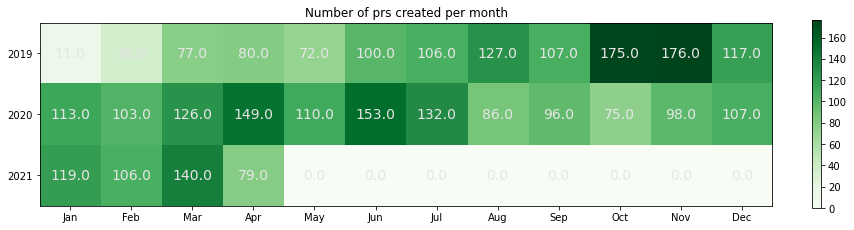

In [5]:


    
pivot = create_pivot(prs,"createdat", "number", "count")
create_mosaic(pivot, "Greens")
plt.title("Number of prs created per month")


None


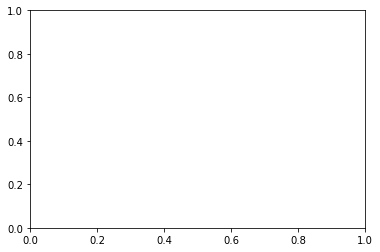

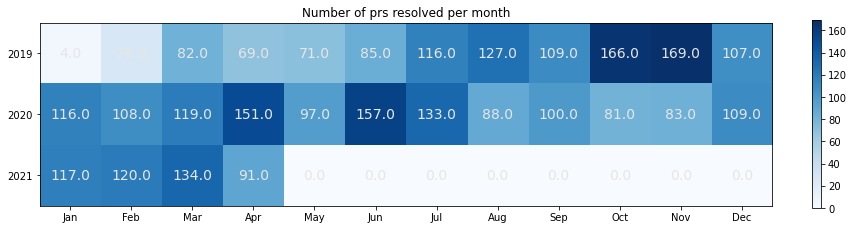

In [6]:
pivot = create_pivot(prs,"closedat", "number", "count")
create_mosaic(pivot, "Blues")
plt.title("Number of prs resolved per month")
plt.show()

# PR per repositories

In [7]:
prs[["org","repo","number"]].groupby(["org","repo"]).count().sort_values("number")

number
org    repo                         
apache ozone-docker-testkrb5       1
       ozone-docker-builder        2
       ozone-docker-runner         5
       ozone-go                    6
       ozone-site                  6
       ozone-docker               18
       hadoop                    773
       ozone                    2165